In [6]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib notebook

from matplotlib import animation, rc
from IPython.display import HTML, Image

rc('animation', html='jshtml')

<IPython.core.display.Javascript object>


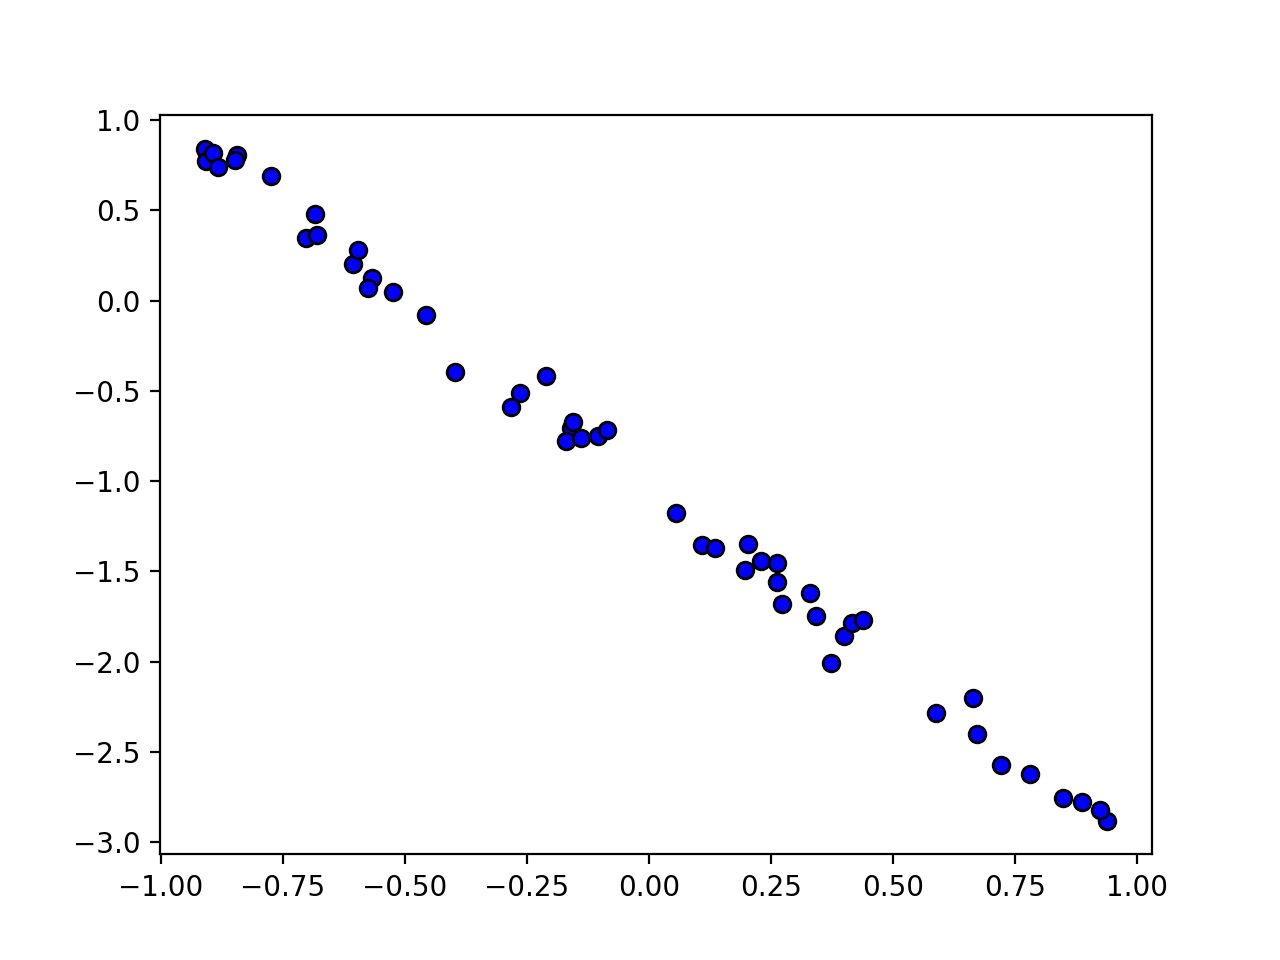

In [7]:
nsamp = 50
w_true = [-1,-2]
x_data = np.random.uniform(-1,1,nsamp)
y_data = np.polyval(w_true[::-1], x_data) + np.random.normal(0, .1, size=x_data.shape)

plt.plot(x_data, y_data, 'ob', markeredgecolor='black');
plt.show()

<IPython.core.display.Javascript object>


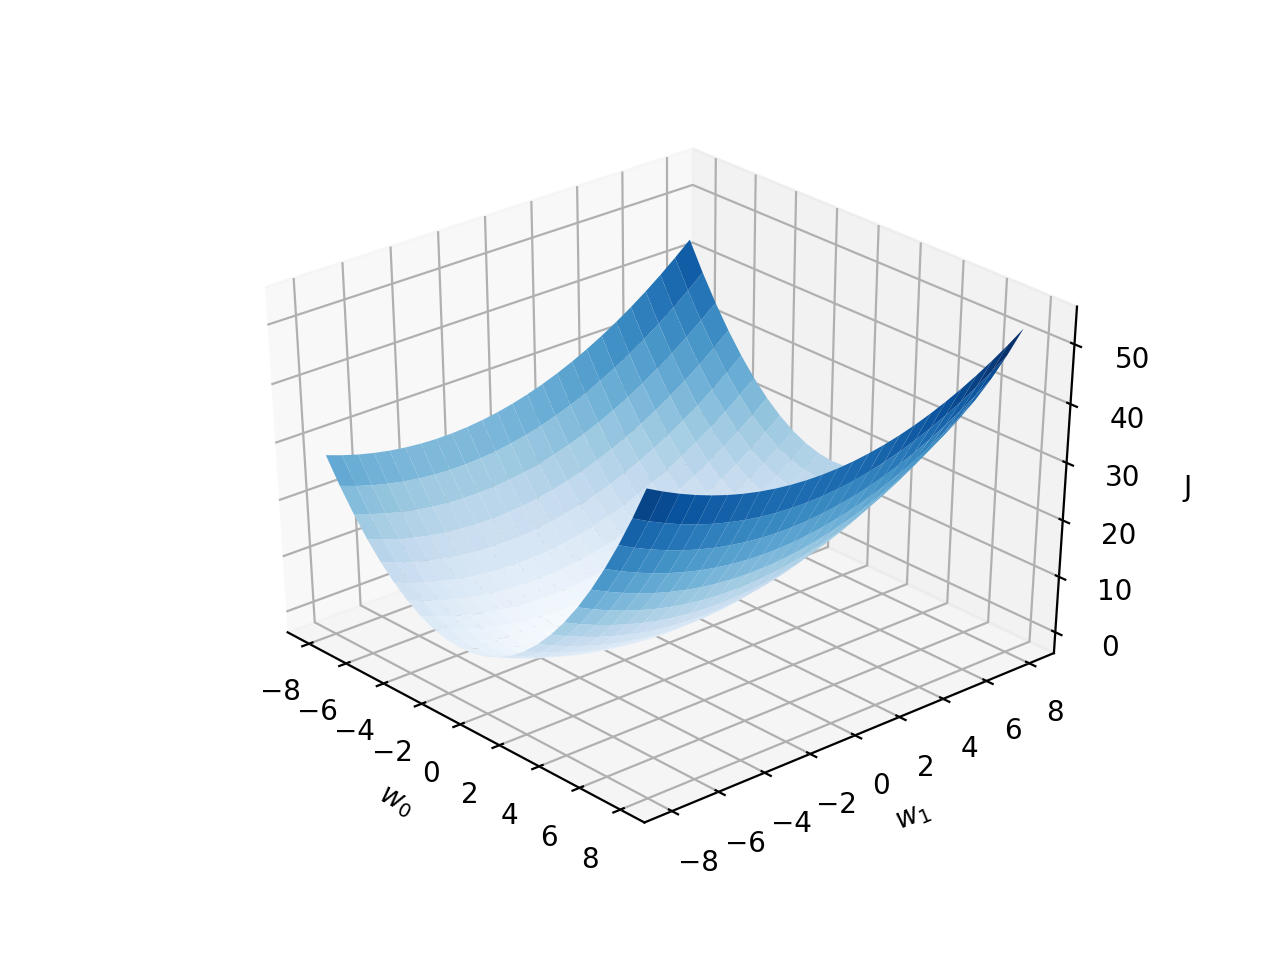

In [8]:
def Model(x,w):
    return np.polyval(w[::-1],x)

def LossFunc(x_batch,y_batch, w):
    return np.mean((y_batch-Model(x_batch,w))**2)/2

M = 25; N = 25
w0space = np.linspace(-8,8,M)
w1space = np.linspace(-8,8,N)
W0, W1 = np.meshgrid(w0space, w1space, indexing='ij')
J = np.empty((M,N))

for i in range(M):
    for j in range(N):
        J[i,j] = LossFunc(x_data, y_data, np.array([W0[i,j], W1[i,j]]))

fig = plt.figure()
ax  = fig.add_subplot(111, projection='3d')
ax.plot_surface(W0,W1,J, cmap=plt.get_cmap('Blues'), zorder=1)

J0 = LossFunc(x_data,y_data,w_true)
ax.scatter(w_true[0], w_true[1], J0, c='blue', edgecolors='black', zorder=10)

ax.set_xlabel(r'$w_0$')
ax.set_ylabel(r'$w_1$')
ax.set_zlabel('J')
plt.show()

## Understanding the cost function :

<IPython.core.display.Javascript object>


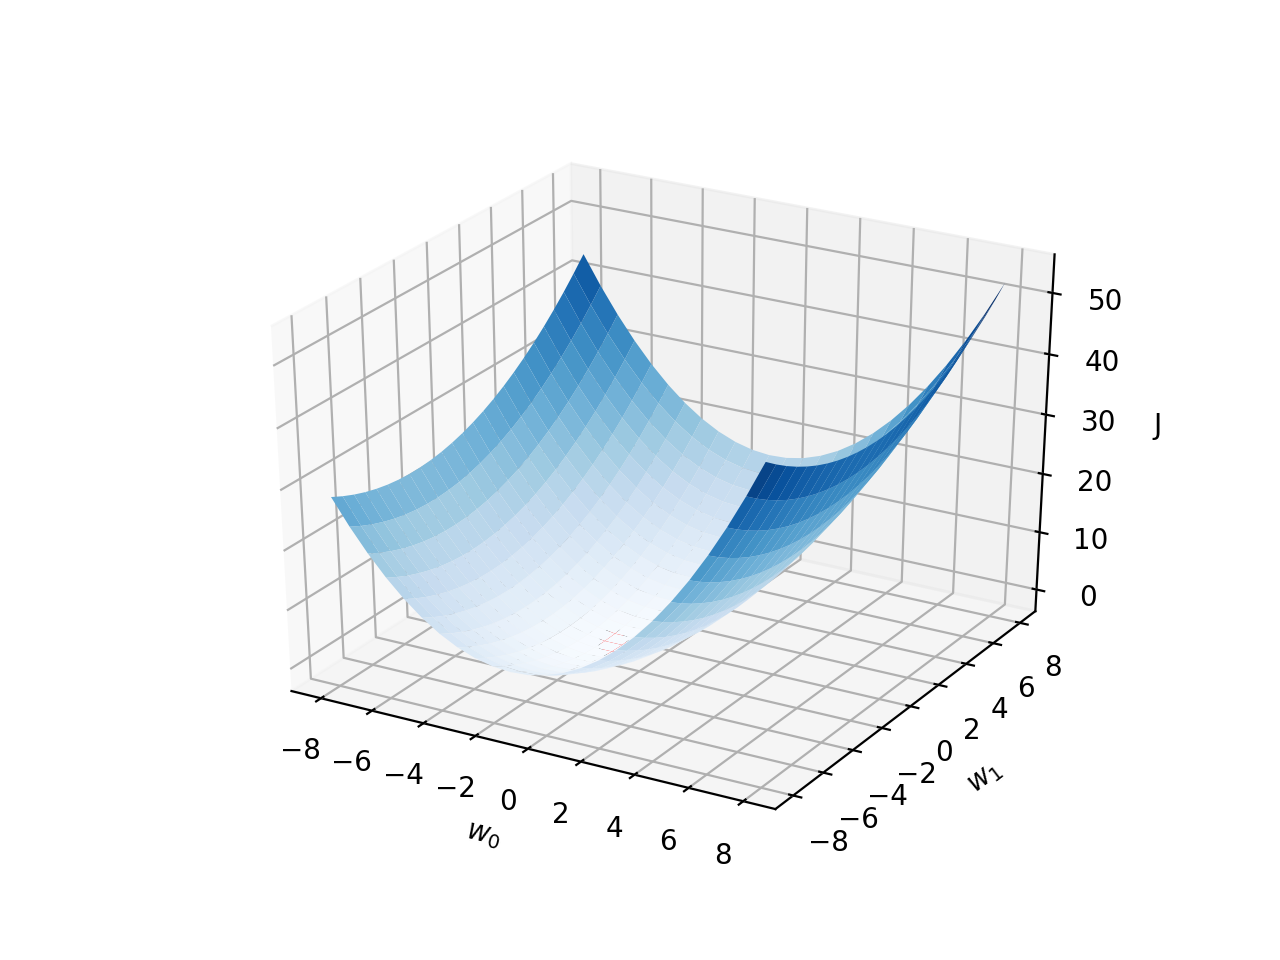

<IPython.core.display.Javascript object>


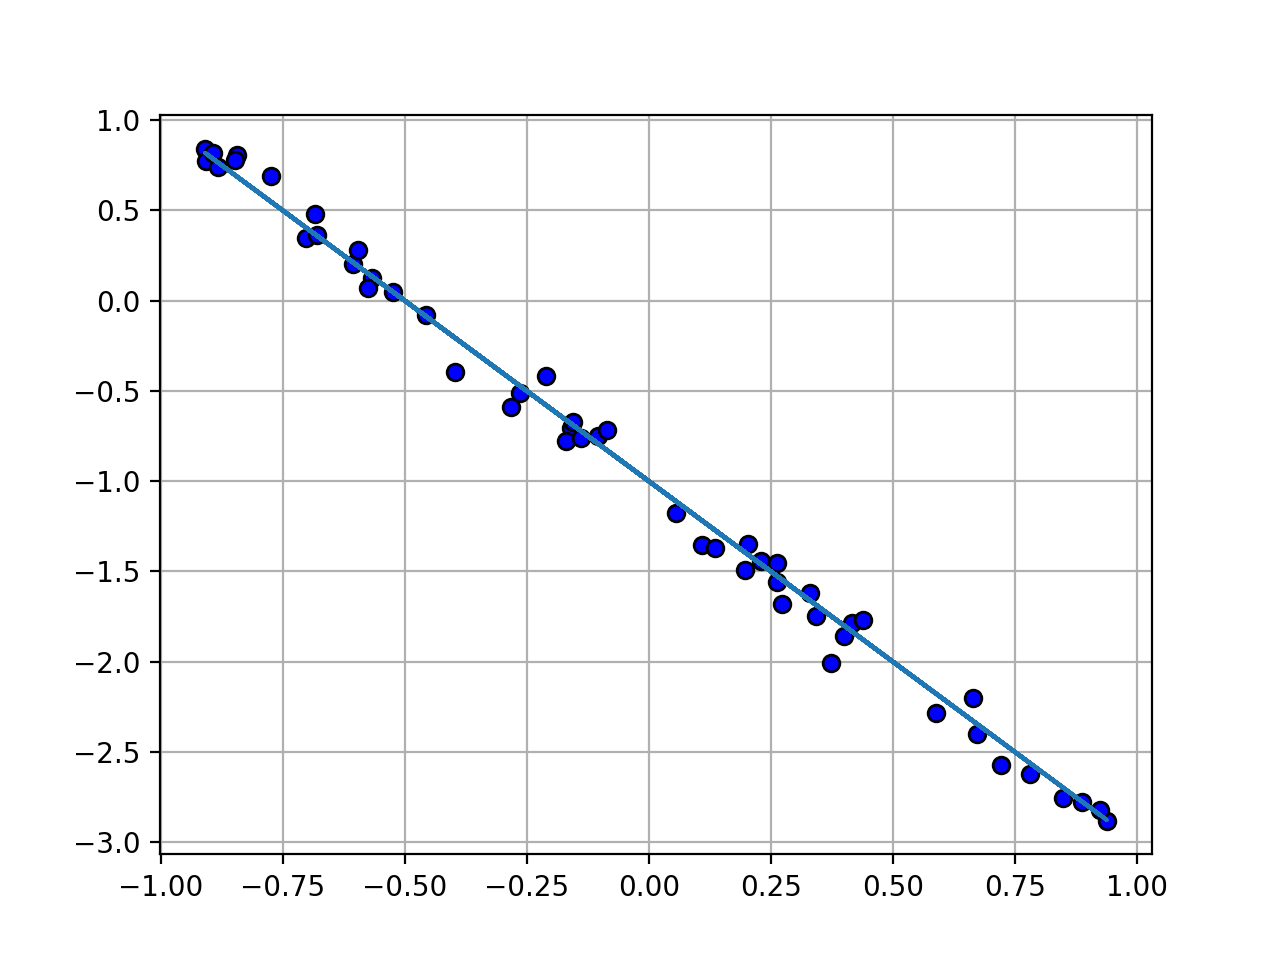

In [32]:
# Play with w0 and w1 :
w = [-1, -2] 
fig1 = plt.figure()
ax = fig1.add_subplot(111, projection='3d')
ax.plot_surface(W0,W1,J, cmap=plt.get_cmap('Blues'), zorder=1)

Jw = LossFunc(x_data,y_data,w)
ax.scatter(w[0], w[1], Jw, s=100, c='red', edgecolors='black')
ax.set_xlabel(r'$w_0$')
ax.set_ylabel(r'$w_1$')
ax.set_zlabel('J')
fig2 = plt.figure()
plt.plot(x_data, y_data, 'ob', markeredgecolor='black')
plt.plot(x_data, np.polyval(w[::-1], x_data))
plt.grid()

## Gradient descent  :

In [16]:
# gradient descent

max_step = 1000
w = np.empty((max_step,2))
Jw = np.empty((max_step,1))

# initial weights (starting point of gradient descent)
w[0, 0] = 2
w[0, 1] = 3

Jw[0] = LossFunc(x_data, y_data, w[0,:])

alpha = .05

def GradJ(x,y,w):
    mx  = np.mean(x)
    mxx = np.mean(x**2)
    mxy = np.mean(x*y)
    return np.array([w[0] + w[1]*mx - np.mean(y), w[0]*mx+ w[1]*mxx - mxy])


n = 1
break_in = 0
while(Jw[n-1]>.1):
    if( n>=max_step ):
        break
    w[n,:] = w[n-1,:] - alpha*GradJ(x_data, y_data, w[n-1,:])
    Jw[n]  = LossFunc(x_data, y_data, w[n])
    if( Jw[n] > Jw[n-1]):
        if(break_in<10):
            break_in+=1
        else:
            break
    n += 1

nstep = n
print(nstep)

w = w[:nstep,:]
Jw = Jw[:nstep]

plt.plot(np.arange(nstep), Jw);

121


(0.0, 50.0)

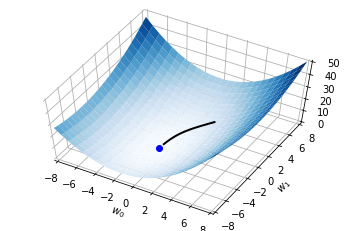

In [6]:
fig = plt.figure()
ax  = fig.add_subplot(111, projection='3d')

ax.plot_surface(W0,W1,J, cmap=plt.get_cmap('Blues'), zorder=1)

J0 = LossFunc(x_data,y_data,w_true)
ax.plot([w_true[0]], [w_true[1]], [J0], 'ob', zorder=10)

ax.plot(w[:,0].flatten(), w[:,1].flatten(), Jw.flatten(), '-k', lw=2, zorder=10)

ax.azim = -60
ax.elev = 60

ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False

ax.xaxis.pane.set_edgecolor('white')
ax.yaxis.pane.set_edgecolor('white')
ax.zaxis.pane.set_edgecolor('white')

ax.set_xlabel(r'$w_0$')
ax.set_ylabel(r'$w_1$')
ax.set_zlabel('J')

ax.set_xlim([-8,8])
ax.set_ylim([-8,8])
ax.set_zlim([0,50])

<IPython.core.display.Javascript object>


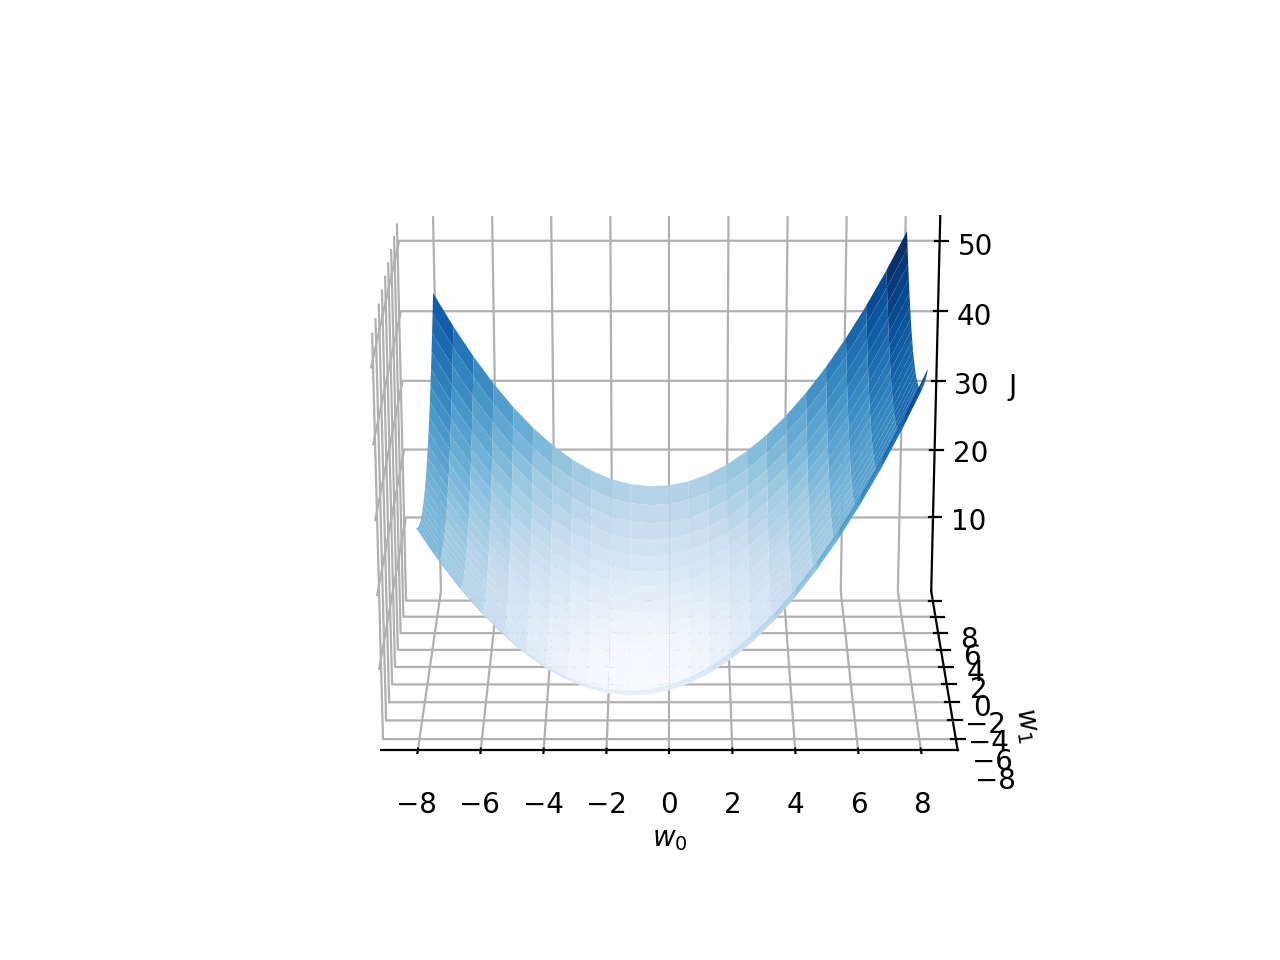

In [17]:
fig = plt.figure()
ax  = fig.add_subplot(111, projection='3d')

z = np.zeros((0))
Z = np.zeros((0,0))
objs = [ax.plot_surface(W0, W1, J, cmap=plt.get_cmap('Blues'), zorder=1),
        ax.plot(z, z, z, '-k', zorder=10)[0],
        ax.plot(z, z, z, 'ob', mec='black', zorder=10)[0],
        ax.text2D(0.05, 0.9, '', transform=ax.transAxes)]

ax.azim = -90
ax.elev = 20

ax.grid(True)
ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False

ax.xaxis.pane.set_edgecolor('white')
ax.yaxis.pane.set_edgecolor('white')
ax.zaxis.pane.set_edgecolor('white')

ax.set_xlabel(r'$w_0$')
ax.set_ylabel(r'$w_1$')
ax.set_zlabel('J');

In [28]:
def init():
    ax.azim = -90
    ax.elev = 20
    return objs

In [29]:
def animate(i):
    objs[1].set_data_3d(w[:i+1,0].flatten(), w[:i+1,1].flatten(), Jw[:i+1].flatten())
    objs[2].set_data_3d(w[i,0], w[i,1], Jw[i])
    ax.azim = ax.azim - .3
    ax.elev = ax.elev + .2
    objs[-1].set_text('n = %d' % (i+1))
    return objs

In [30]:
mpl.rcParams['animation.embed_limit'] = 120e6
anim = animation.FuncAnimation(fig, animate, init_func=init, frames=nstep,
                               interval=20, blit=True)

In [31]:
anim

AttributeError: 'Line3D' object has no attribute 'set_data_3d'

## Try different learning rate and generate the animation. What happens when the learning rate is too small or too large?